In [3]:
import pandas as pd

# Load the dataset
file_path = '/content/Dataset_OSCC (2) (1) (1).xlsx'
data = pd.read_excel(file_path)

# Display the first few rows and summary of the dataset
data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Sl No                                    112 non-null    int64 
 1   AGE                                      112 non-null    int64 
 2   SEX                                      112 non-null    object
 3   SITE                                     112 non-null    object
 4   Duration                                 112 non-null    object
 5   cT                                       112 non-null    object
 6   cN                                       112 non-null    object
 7   pT                                       112 non-null    object
 8   pN                                       112 non-null    object
 9    (surgery is compulsory for all ) RT/CT  112 non-null    object
 10  DEGREE OF DIFFERENTIATION                112 non-null    objec

(None,
    Sl No   AGE  SEX                               SITE         Duration  cT  \
 0       1    52   F                 Ca left lower lip            8 days  T2   
 1       2    44   M          Ca left commisure of lip            8 days  T1   
 2       3    44   M  Ca right lateral border of tongue          11 days  T4   
 3       4    50   F  Ca right lateral border of tongue          04 days  T2   
 4       5    27   M  Ca right Lateral border of tongue  1 month 16 days  T1   
 
    cN  pT  pN  (surgery is compulsory for all ) RT/CT  \
 0  N0  T2  N0                      surgery / No RT/CT   
 1  N0  T1  N0                                      No   
 2  NO  T2  N0                                      No   
 3  N1  T2  N0                                      No   
 4  N1  T1  N0                                RT & CT    
 
   DEGREE OF DIFFERENTIATION Pathologic group Stage  Recurrence  
 0                     MDSCC                     II           0  
 1                     WDSCC 

In [4]:
# Data Cleaning and Preparation

# Convert 'Duration' to a more uniform format (days)
# Standardize column names
data.columns = data.columns.str.strip()

# View unique values in 'Duration' to understand its format
unique_durations = data['Duration'].unique()

unique_durations

array(['8 days', '11 days', '04 days', '1 month 16 days', '4 days',
       '2 days', '7 days', '22 days', '1 month 26 days', '1 day',
       '1 month,  4 days', '5 days', '19 days', '03 days',
       '2 months , 6 days', '1month , 04 days', '1 month, 11 days',
       '1 month, 9 days', '1 month, 11 days ', '1 month, 15 days',
       '1 month, 16 days', '1 month,  1day ', '1 month ,  2days',
       '1 month', '1 month,  17 days', '1 month ,  17 days ',
       '1 month,  12 days ', '1 month , 8 days', '21 days', '13 days',
       '09 days', '02 days ', '08 days ', '01 day', '13 days ', '12 days',
       '1 month, 10 days', '1 month, 08 days', '1 month, 19 days',
       '8 days ', '1 month, 25 days', '15 days ', '1 month , 20 days',
       '1 yr, 11 months, 20 days', '1 month, 24 days', '7 days ',
       '2 days ', '3 days', '9 days', '1 month, 2 days',
       '1 month, 14 days', '1 month , 27 days', '1 month, 7 days',
       '06 days', '1 month, 23 days', '1 month, 6 days',
       '10 da

In [20]:
import re

def duration_to_days(duration):
    """Convert duration string to total days."""
    # Clean the duration string
    duration = duration.lower().replace(',', '').strip()

    # Initialize days
    total_days = 0

    # Match patterns for days, months, and years
    day_pattern = re.search(r'(\d+)\s*day', duration)
    month_pattern = re.search(r'(\d+)\s*month', duration)
    year_pattern = re.search(r'(\d+)\s*yr', duration)

    # Convert days
    if day_pattern:
        total_days += int(day_pattern.group(1))

    # Convert months to days (assuming 30 days per month)
    if month_pattern:
        total_days += int(month_pattern.group(1)) * 30

    # Convert years to days (assuming 365 days per year)
    if year_pattern:
        total_days += int(year_pattern.group(1)) * 365

    return total_days

# Apply the conversion function to the 'Duration' column
data['Duration_days'] = data['Duration'].apply(duration_to_days)

# Display the updated dataset with the new 'Duration_days' column
data[['Duration', 'Duration_days']].head()


,Duration,Duration_days
0,8 days,8
1,8 days,8
2,11 days,11
3,04 days,4
4,1 month 16 days,46


from matplotlib import pyplot as plt
_df_0['Duration_days'].plot(kind='hist', bins=20, title='Duration_days')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Duration').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Duration_days'].plot(kind='line', figsize=(8, 4), title='Duration_days')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['Duration'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='Duration_days', y='Duration', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

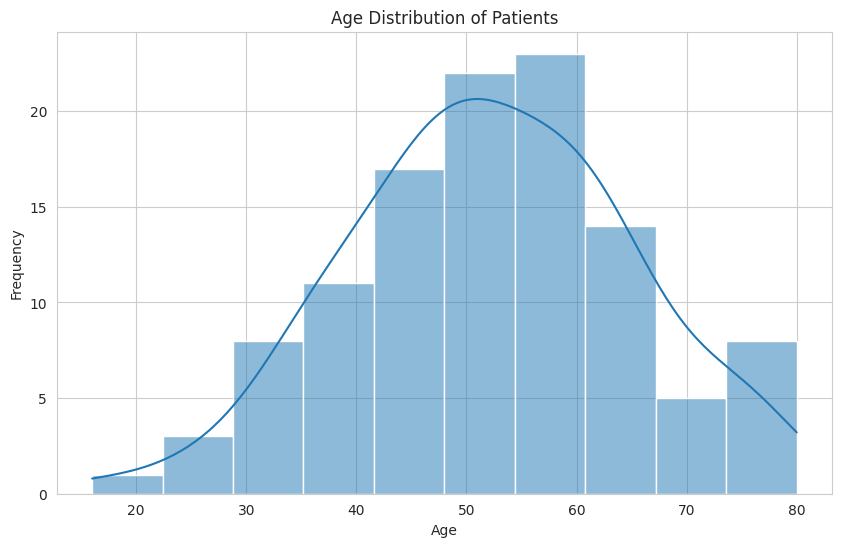

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['AGE'], bins=10, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


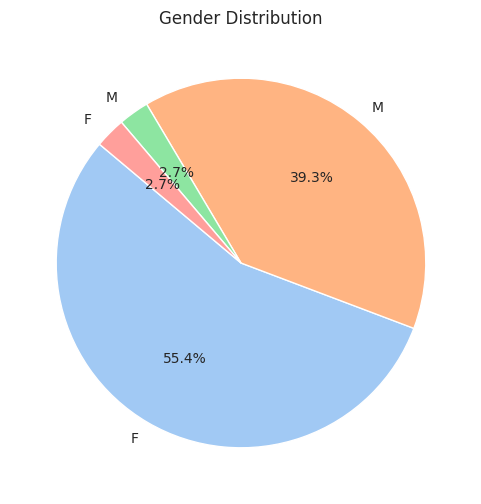

In [23]:
# Plot Gender Distribution
plt.figure(figsize=(6, 6))
gender_counts = data['SEX'].str.upper().value_counts() #improvisation - make a list and plot

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Gender Distribution')
plt.show()

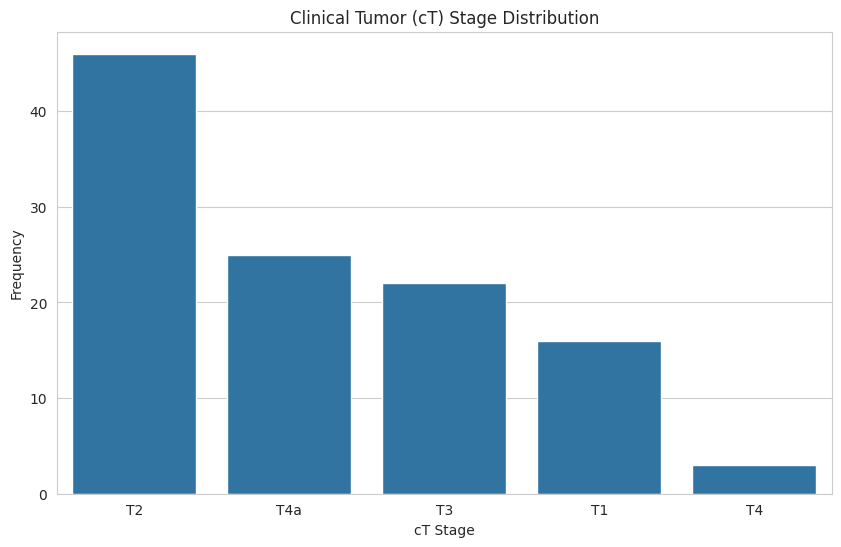

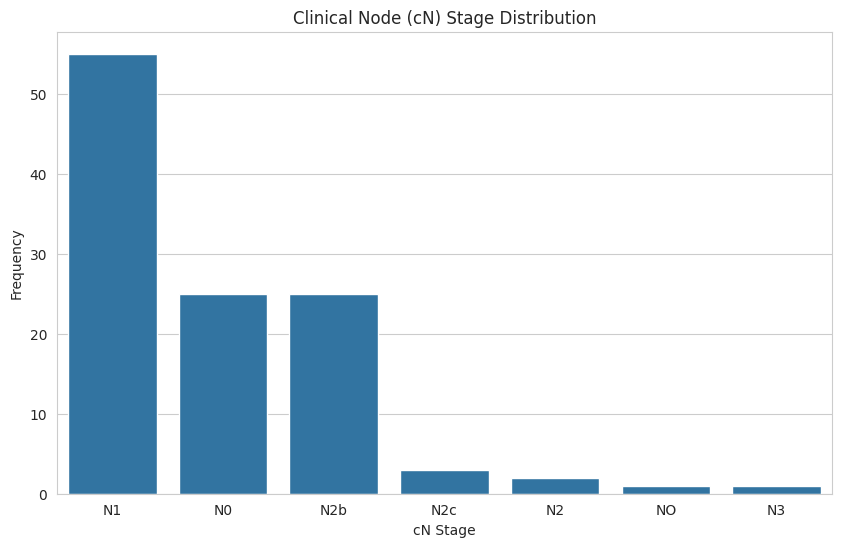

In [24]:
# Plot cT Stage Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='cT', data=data, order=data['cT'].value_counts().index)
plt.title('Clinical Tumor (cT) Stage Distribution')
plt.xlabel('cT Stage')
plt.ylabel('Frequency')
plt.show()

# Plot cN Stage Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='cN', data=data, order=data['cN'].value_counts().index)
plt.title('Clinical Node (cN) Stage Distribution')
plt.xlabel('cN Stage')
plt.ylabel('Frequency')
plt.show()

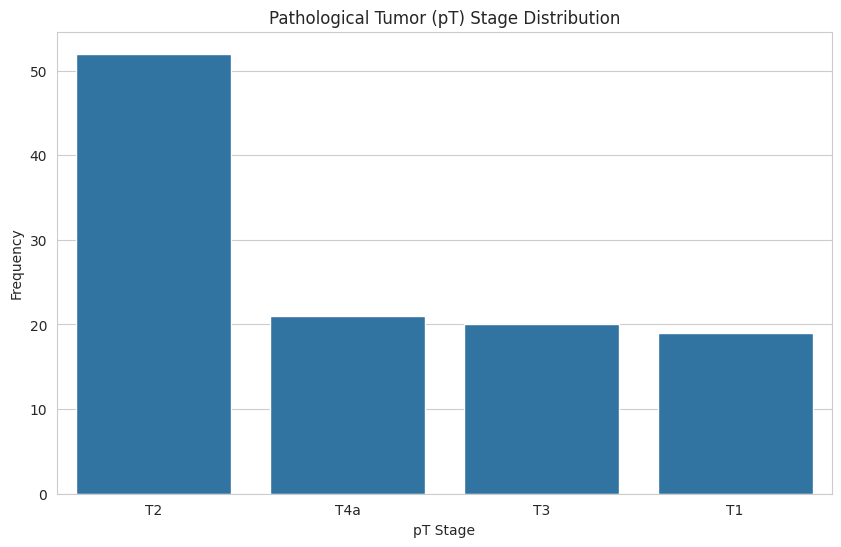

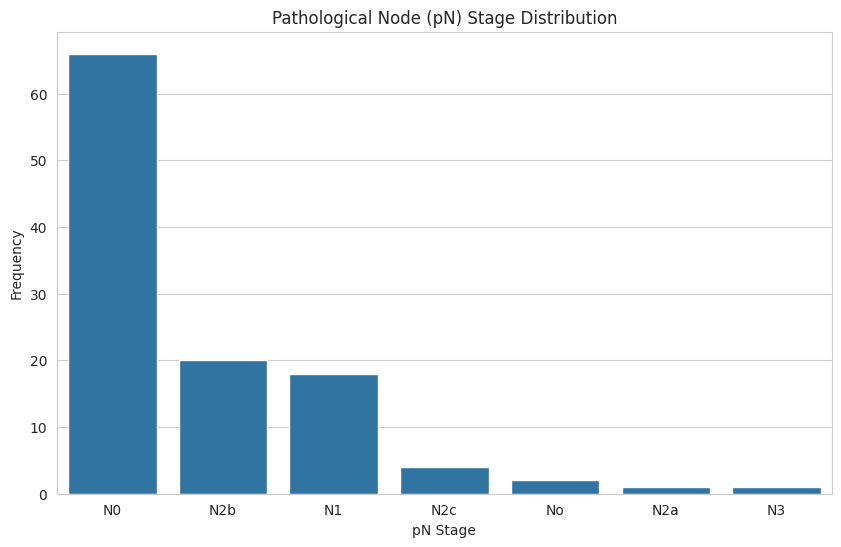

In [25]:
# Plot pT Stage Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='pT', data=data, order=data['pT'].value_counts().index)
plt.title('Pathological Tumor (pT) Stage Distribution')
plt.xlabel('pT Stage')
plt.ylabel('Frequency')
plt.show()

# Plot pN Stage Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='pN', data=data, order=data['pN'].value_counts().index)
plt.title('Pathological Node (pN) Stage Distribution')
plt.xlabel('pN Stage')
plt.ylabel('Frequency')
plt.show()


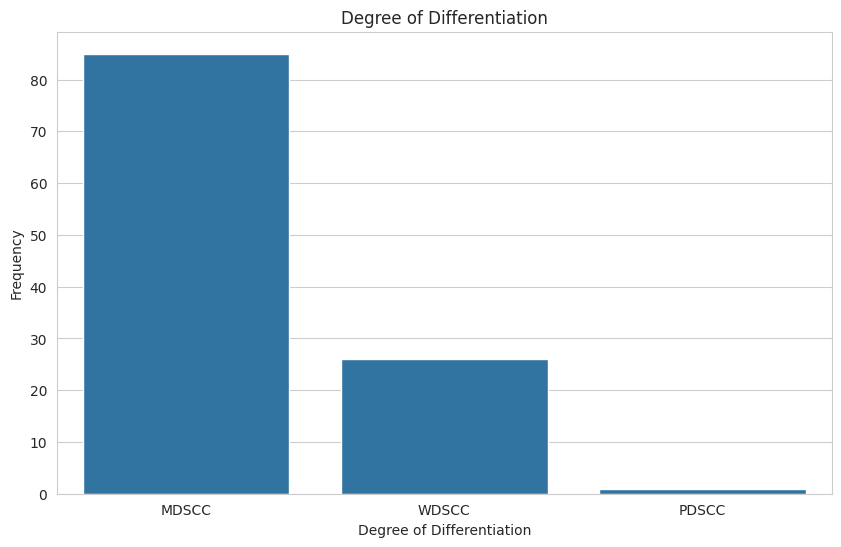

In [29]:
# Plot Degree of Differentiation
plt.figure(figsize=(10, 6))
sns.countplot(x='DEGREE OF DIFFERENTIATION', data=data, order=data['DEGREE OF DIFFERENTIATION'].value_counts().index)
plt.title('Degree of Differentiation')
plt.xlabel('Degree of Differentiation')
plt.ylabel('Frequency')
plt.show()


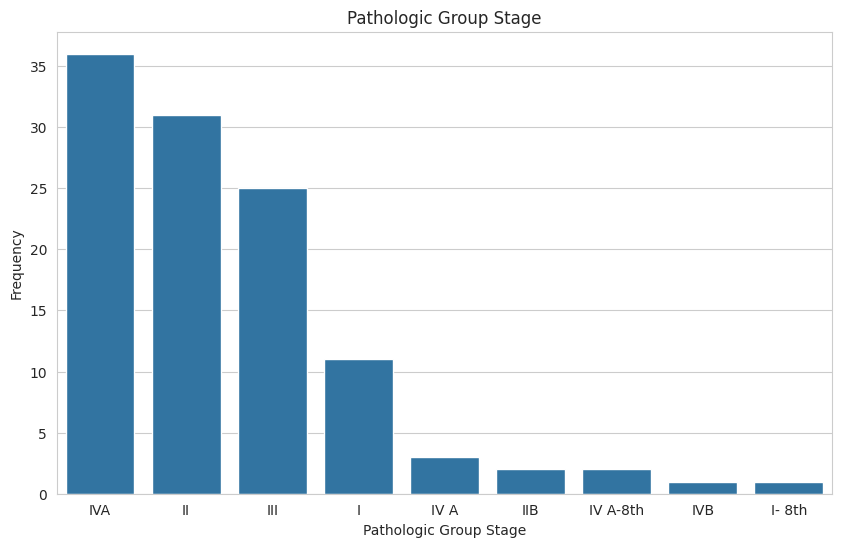

In [27]:
# Plot Pathologic Group Stage
plt.figure(figsize=(10, 6))
sns.countplot(x='Pathologic group Stage', data=data, order=data['Pathologic group Stage'].value_counts().index)
plt.title('Pathologic Group Stage')
plt.xlabel('Pathologic Group Stage')
plt.ylabel('Frequency')
plt.show()


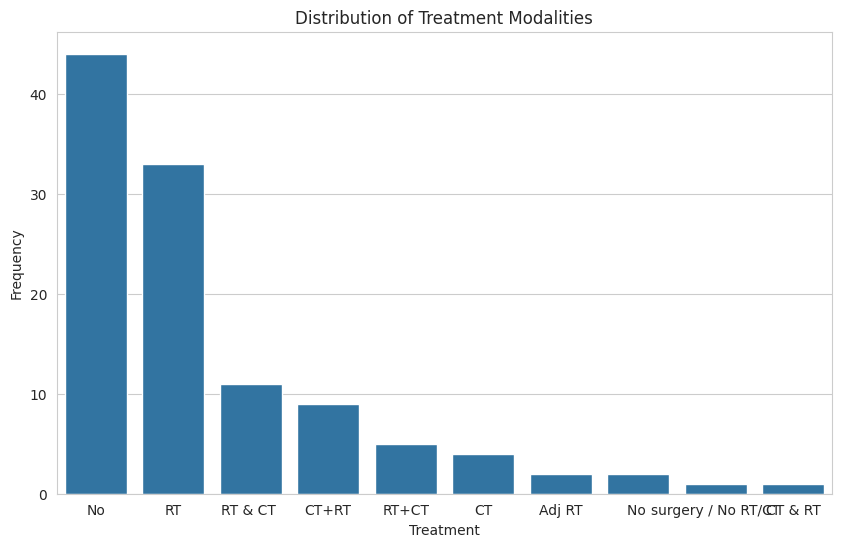

In [30]:
# Plot Treatment Modalities
plt.figure(figsize=(10, 6))
sns.countplot(x='(surgery is compulsory for all ) RT/CT', data=data, order=data['(surgery is compulsory for all ) RT/CT'].value_counts().index)
plt.title('Distribution of Treatment Modalities')
plt.xlabel('Treatment')
plt.ylabel('Frequency')
plt.show()


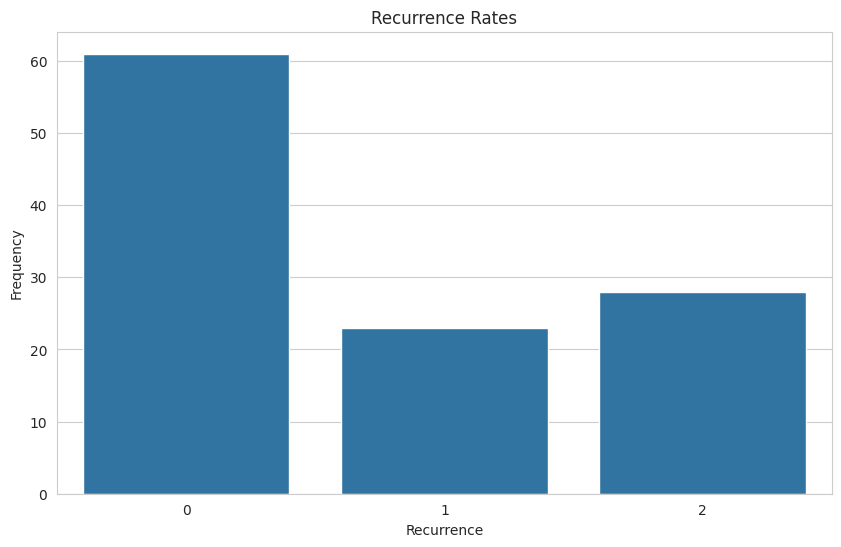

In [31]:
# Plot Recurrence Rates
plt.figure(figsize=(10, 6))
sns.countplot(x='Recurrence', data=data)
plt.title('Recurrence Rates')
plt.xlabel('Recurrence')
plt.ylabel('Frequency')
plt.show()
